## Exploratory Data Analysis of European Football Database (2008 ‒ 2016) Using SQL & Python

#### What is the European Soccer Database?

European Soccer (Football) Database is an open-source database based in the SQLite database engine available on Kaggle for use in data analysis and machine learning projects. The database contains information about more than 25,000 matches and 10,000 players, and nearly 300 teams across football leagues in 11 countries in Europe between the 2008/2009 and 2015/2016 season sourced from multiple websites. Additionally, the database also contains information about weekly updated player attributes and ratings sourced from corresponding yearly instalments of the FIFA franchise from Electronic Arts and EA SPORTS, and betting odds from up to 10 odds providers.

**Database:** https://www.kaggle.com/datasets/hugomathien/soccer

#### Questions Explored:

- What was the win percentage, and the aggregated number of wins, losses, goals scored, and goals conceded for each team in each season across each league that they're associated with?
- Which were the top ten teams with the most wins across all seasons and leagues during the entire duration?
- Which (did) team attributes played a major part in determining the performance (aggregated goals scored) of the teams?
- How did the aggregated goals scored for the top five highest-scoring teams in a specific league (Italy Serie A) change over the seasons?
- Did the Body Mass Index (BMI) of the players affect their performance score (overall rating)?
- Who were the top ten players with the highest performance scores (overall ratings) across all seasons and leagues during the entire duration?
- How do the player attributes of the consistently highest-rated players compare to the average player attributes?
- Which player attributes set the consistently highest-rated player apart from the average player attributes, and by how much?

### Limitations:

- At first sight, the player attributes suggest outliers present in the database when assessing the defensive attributes, but there are actually none because these outliers are primarily present in the goalkeeping attributes and the information about goalkeepers is very restricting, since the database provides no details about the positions of the players to accurately and efficiently analyse the player attributes corresponding to the positions the players play.

- The database has a very inefficiently established relation between the **Player** and **Player_Attributes** tables and the tables containing information about the matches and teams. Of course, these table *can* be joined, but the method is extremely redundant and could result in information loss. Knowing which team the players belonged to through the team_api_id column corresponding to the **Player** table could potentially open the database up to further analysis possibilities, like finding whether (or which) player attributes had a significant influence on the outcome of matches and team performances.

Since the database used for this project is based in the SQLite database engine, I've used the in-built ``sqlite3`` module, which provides a straightforward interface for interacting with SQLite databases within Python. Additionally, I've also used the ``pandas`` module, which provides the **pandas.read_sql_query** function to return a pandas.DataFrame corresponding to the result set of the query string, to access and read the database and, eventually, analyse and visualise the results.

In [1]:
#   Importing the necessary libraries/modules.

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#   Ignoring any FutureWarning messages.

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

The first part of this project is to establish a connection with the SQLite database, which can be conveniently done through the **sqlite3.connect** function. Once the connection has been established, the next step is to create an **sqlite3.Cursor** instance to execute SQL statements and fetch results from SQL queries.

In [2]:
connection=sqlite3.connect("database.sqlite")   #   Establishing a connection with the database.
cursor=connection.cursor()  #   Creating a cursor object to execute queries.

Now that the connection has been successfully established, the database can be analysed by fetching results from SQL queries and storing them in a pandas.DataFrame. As can be seen in the result, the **pandas.read_sql_query** is successfully able to store the first ten rows of the **Match** table into a pandas.DataFrame through the corresponding SQL query, which means that the database can be analysed further.

In [3]:
dataframe=pd.read_sql_query('''SELECT *
                                FROM Match
                                LIMIT 10;''', connection)
dataframe

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
5,6,1,1,2008/2009,1,2008-09-24 00:00:00,492478,8203,8342,1,...,1.67,4.35,3.40,1.70,4.50,3.40,1.70,NaN,NaN,NaN
6,7,1,1,2008/2009,1,2008-08-16 00:00:00,492479,9999,8571,2,...,3.60,2.10,3.25,3.00,1.85,3.25,3.75,2.10,3.25,3.10
7,8,1,1,2008/2009,1,2008-08-16 00:00:00,492480,4049,9996,1,...,2.40,2.80,3.25,2.25,2.80,3.20,2.25,2.88,3.25,2.20
8,9,1,1,2008/2009,1,2008-08-16 00:00:00,492481,10001,9986,1,...,3.10,2.25,3.25,2.80,2.20,3.30,2.80,2.25,3.20,2.80
9,10,1,1,2008/2009,10,2008-11-01 00:00:00,492564,8342,8571,4,...,10.00,1.30,4.35,8.50,1.25,5.00,10.00,1.29,4.50,9.00


Firstly, I've started by finding some fundamental information from the database, such as the total number of distinct countries, leagues, teams, and players.

In [4]:
#   Extracting the distinct values of the columns containing the names corresponding to the tables.

countries=cursor.execute('''SELECT COUNT(DISTINCT name)
                                FROM League;''').fetchall()
leagues=cursor.execute('''SELECT COUNT(DISTINCT name)
                            FROM League;''').fetchall()
teams=cursor.execute('''SELECT COUNT(DISTINCT team_long_name)
                            FROM Team;''').fetchall()
players=cursor.execute('''SELECT COUNT(DISTINCT player_name)
                            FROM Player;''').fetchall()

#   Printing the count of each table.

print("Countries: ", countries[0][0])
print("Leagues: ", leagues[0][0])
print("Teams: ", teams[0][0])
print("Players: ", players[0][0])

Countries:  11
Leagues:  11
Teams:  296
Players:  10848


### Processing the Database into the Required Format:

Based on the database, the first thing that can be noticed is that there is a column for league_id, country_id, home_team_api_id, and away_team_api_id in the **Match** table, which means that it corresponds directly to the **League**, **Country**, and **Team** tables. Hence, it would be wise to join the tables together based on a common attribute (the foreign keys). For this, I've used an inner join, which combines the names of the leagues, countries, home teams, and away teams in newly created columns corresponding to their identification numbers in the **Match** table.

Since SQLite database does not support the use of the FROM clause after the SET clause in an UPDATE statement, I've manually joined the tables using the WHERE clause with the SET clause to filter the rows that are updated to only the rows that have a valid foreign key. Additionally, the country_id column in the **League** table seemed to be giving an error regarding its existence in the database, which is why I used the WHERE clause to filter only the non-null entries in the column (a commonly disregarded value in relational databases).

In [5]:
cursor.execute("BEGIN TRANSACTION;")    #   Beginning a transaction to improve the execution time of the queries.

#   Creating corresponding columns in the table to store the names of the leagues and countries.

cursor.execute('''ALTER TABLE Match
                    ADD COLUMN "Leagues" TEXT;''')
cursor.execute('''ALTER TABLE Match
                    ADD COLUMN "Countries" TEXT;''')
cursor.execute('''ALTER TABLE Match
                    ADD COLUMN "Home_Team" TEXT;''')
cursor.execute('''ALTER TABLE Match
                    ADD COLUMN "Away_Team" TEXT;''')

#   Updating the corresponding columns with the names of the leagues and countries after joining the tables.

cursor.execute('''UPDATE Match
                    SET Leagues=(
                        SELECT League.name
                        FROM League
                        WHERE Match.league_id=League.id),
                    Countries=(
                        SELECT Country.name
                        FROM Country
                        WHERE Match.country_id=Country.id),
                    Home_Team=(
                        SELECT Team.team_long_name
                        FROM Team
                        WHERE Match.home_team_api_id=Team.team_api_id),
                    Away_Team=(
                        SELECT Team.team_long_name
                        FROM Team
                        WHERE Match.away_team_api_id=Team.team_api_id)
                    WHERE league_id IN (
                        SELECT id
                        FROM League)
                    AND country_id IS NOT NULL
                    AND home_team_api_id IN (
                        SELECT team_api_id
                        FROM Team)
                    AND away_team_api_id IN (
                        SELECT team_api_id
                        FROM Team);''')

cursor.execute("END TRANSACTION;")  #   Ending the transaction.

After joining the tables together based on their corresponding foreign keys, it can be seen that there are now four newly created columns in the database, each storing the names of leagues, countries, home teams, and away teams corresponding to their match information. With this merge, it has become significantly easier to analyse the database for statistics about all the teams.

In [6]:
dataframe=pd.read_sql_query('''SELECT *
                                FROM Match
                                    LIMIT 10;''', connection)
dataframe

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,GBH,GBD,GBA,BSH,BSD,BSA,Leagues,Countries,Home_Team,Away_Team
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,1.78,3.25,4.00,1.73,3.40,4.20,Belgium Jupiler League,Belgium,KRC Genk,Beerschot AC
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,1.85,3.25,3.75,1.91,3.25,3.60,Belgium Jupiler League,Belgium,SV Zulte-Waregem,Sporting Lokeren
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,3.20,2.50,2.30,3.20,2.75,Belgium Jupiler League,Belgium,KSV Cercle Brugge,RSC Anderlecht
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,1.50,3.75,5.50,1.44,3.75,6.50,Belgium Jupiler League,Belgium,KAA Gent,RAEC Mons
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,4.50,3.50,1.65,4.75,3.30,1.67,Belgium Jupiler League,Belgium,FCV Dender EH,Standard de Liège
5,6,1,1,2008/2009,1,2008-09-24 00:00:00,492478,8203,8342,1,...,4.50,3.40,1.70,NaN,NaN,NaN,Belgium Jupiler League,Belgium,KV Mechelen,Club Brugge KV
6,7,1,1,2008/2009,1,2008-08-16 00:00:00,492479,9999,8571,2,...,1.85,3.25,3.75,2.10,3.25,3.10,Belgium Jupiler League,Belgium,KSV Roeselare,KV Kortrijk
7,8,1,1,2008/2009,1,2008-08-16 00:00:00,492480,4049,9996,1,...,2.80,3.20,2.25,2.88,3.25,2.20,Belgium Jupiler League,Belgium,Tubize,Royal Excel Mouscron
8,9,1,1,2008/2009,1,2008-08-16 00:00:00,492481,10001,9986,1,...,2.20,3.30,2.80,2.25,3.20,2.80,Belgium Jupiler League,Belgium,KVC Westerlo,Sporting Charleroi
9,10,1,1,2008/2009,10,2008-11-01 00:00:00,492564,8342,8571,4,...,1.25,5.00,10.00,1.29,4.50,9.00,Belgium Jupiler League,Belgium,Club Brugge KV,KV Kortrijk


#### ‣ What was the win percentage, and the aggregated number of wins, losses, goals scored, and goals conceded for each team in each season across each league that they're associated with?

Now that the database has been organised in the required way, I've calculated some statistics about the teams, such as the win percentage, goals scored, and goals conceded, by grouping the database in order of teams, seasons, and leagues and storing the result in a pandas.DataFrame. This will, of course, shorten the size of the database significantly to only provide information that's needed.

The SQL query written to fetch the result and calculate the necessary statistics is performing several operations on the **Match** table to retrieve specific information.

- Using two SELECT statements to select the Home_Team, Away_Team, season, Leagues, home_team_goal, and away_team_goal columns from the **Match** table.
- Using the GROUP BY and DESC clause to group the database by the Team, season, and Leagues columns, which groups the database by the team, season and league.
- Using the COUNT function to count the number of matches played by each team in each season.
- Using the SUM function to calculate the total number of goals scored and goals conceded by each team in each season.
- Using the CASE statement with the SUM function to calculate the number of wins, draws, and losses for each team in each season.
- Using the SUM function with a division by the COUNT function to calculate the win percentage for each team in each season.
- Using the UNION operator to combine both the result of the home teams and away teams.
- Using the ORDER BY and DESC clause to order the result by the win percentage in descending order.

In [7]:
dataframe=pd.read_sql_query('''SELECT Home_Team AS "Team",
                                season AS "Season",
                                Leagues AS "League",
                                COUNT(*) AS "Matches_Played",
                                SUM(home_team_goal) AS "Goals_Scored",
                                SUM(away_team_goal) AS "Goals_Conceded",
                                SUM(
                                    CASE WHEN home_team_goal>away_team_goal
                                    THEN 1
                                    ELSE 0
                                    END) AS "Wins",
                                SUM(
                                        CASE WHEN home_team_goal=away_team_goal
                                        THEN 1
                                        ELSE 0
                                        END) AS "Draws",
                                SUM(
                                        CASE WHEN home_team_goal<away_team_goal
                                        THEN 1
                                        ELSE 0
                                        END) AS "Losses",
                                SUM(
                                        CASE WHEN home_team_goal>away_team_goal
                                        THEN 1
                                        ELSE 0
                                        END)*100/COUNT(*) AS "Win_Percentage"
                                FROM Match
                                GROUP BY Team, season, Leagues
                                UNION
                                SELECT Away_Team AS "Team",
                                season AS "Season",
                                Leagues AS "League",
                                COUNT(*) AS "Matches_Played",
                                SUM(away_team_goal) AS "Goals_Scored",
                                SUM(home_team_goal) AS "Goals_Conceded",
                                SUM(
                                        CASE WHEN away_team_goal>home_team_goal
                                        THEN 1
                                        ELSE 0
                                        END) AS "Wins",
                                SUM(
                                        CASE WHEN away_team_goal=home_team_goal
                                        THEN 1
                                        ELSE 0
                                        END) AS "Draws",
                                SUM(
                                        CASE WHEN away_team_goal<home_team_goal
                                        THEN 1
                                        ELSE 0
                                        END) AS "Losses",
                                SUM(
                                        CASE WHEN away_team_goal>home_team_goal
                                        THEN 1
                                        ELSE 0
                                        END)*100/COUNT() AS "Win_Percentage"
                                FROM Match
                                GROUP BY Team, season, Leagues
                                ORDER BY Win_Percentage
                                DESC;''', connection)
dataframe

,Team,Season,League,Matches_Played,Goals_Scored,Goals_Conceded,Wins,Draws,Losses,Win_Percentage
0,Juventus,2013/2014,Italy Serie A,19,47,9,19,0,0,100
1,KV Oostende,2013/2014,Belgium Jupiler League,3,4,0,3,0,0,100
2,Ajax,2009/2010,Netherlands Eredivisie,17,64,4,16,1,0,94
3,FC Barcelona,2009/2010,Spain LIGA BBVA,19,57,11,18,1,0,94
4,FC Barcelona,2012/2013,Spain LIGA BBVA,19,63,15,18,1,0,94
...,...,...,...,...,...,...,...,...,...,...
2951,Valenciennes FC,2008/2009,France Ligue 1,19,8,24,0,10,9,0
2952,Waasland-Beveren,2013/2014,Belgium Jupiler League,3,3,6,0,1,2,0
2953,Widzew Łódź,2013/2014,Poland Ekstraklasa,15,8,33,0,1,14,0
2954,Willem II,2010/2011,Netherlands Eredivisie,17,9,50,0,3,14,0


From the resulting pandas.DataFrame, the number of matches played, goals scored, goals conceded, wins, draws, losses and win percentage for each team in each season and league can be seen. For instance, the result shows that Juventus F.C. had the highest win percentage in Italy Serie A during the 2013/2014 season, which was exactly the case (https://en.wikipedia.org/wiki/2013%E2%80%9314_Serie_A), so the result seems accurate.

#### ‣ Which were the top ten teams with the most wins across all seasons and leagues during the entire duration?

Once the database had been analysed and the aggregated information has successfully been fetched into a significantly smaller pandas.DataFrame, it only makes sense to create some foundational visualisations, such as finding the top ten teams with the most wins across all seasons and leagues during the entire duration.

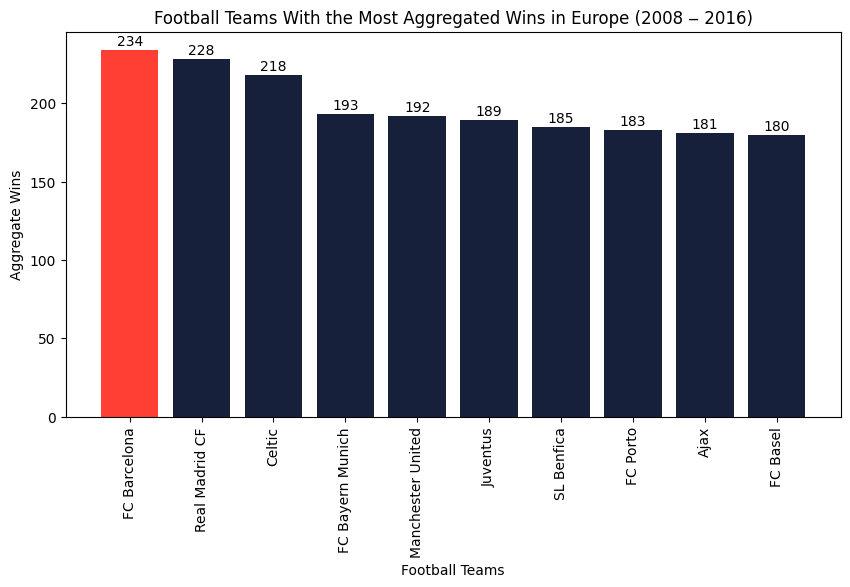

In [8]:
wins=dataframe.groupby(["Team", "League"])["Wins"].sum().reset_index()  #   Grouping the pandas.DataFrame by team and league, and summing the wins.
wins=wins.sort_values(by="Wins", ascending=False).reset_index(drop=True)    #   Sorting the pandas.DataFrame by the wins in descending order.

#   Plotting a bar graph for the top ten teams with the most wins across all seasons and leagues.

plt.figure(figsize=(10, 5))
plt.bar(wins["Team"][:10], wins["Wins"][:10], color="#17203b")
plt.bar(wins["Team"][0], wins["Wins"][0], color="#ff3f34")
plt.xticks(rotation=90)
plt.xlabel("Football Teams")
plt.ylabel("Aggregate Wins")
plt.title("Football Teams With the Most Aggregated Wins in Europe (2008 ‒ 2016)")
for i in range(10):
    plt.text(x=i, y=wins["Wins"][i]+3, s=wins["Wins"][i], ha="center")
plt.show()

From the visualised bar chart, it's clear that FC Barcelona had the most wins (234 wins) across all seasons and leagues during the entire duration, followed by Real Madrid CF (228 wins) and Celtic FC (218 wins).

Additionally, there's also a **Team_Attributes** table in the database, which contains attributes about each team corresponding to their foreign keys. Like with the **Match** table, the first thought that comes to mind when coming across this table is to join the attributes of each team with their corresponding names based on the corresponding foreign keys in the **Team** table. Since the **Team_Attributes** table is relatively small, I've stored it in a pandas.DataFrame for further analysis.

In [9]:
cursor.execute("BEGIN TRANSACTION;")    #   Beginning a transaction to improve the execution time of the queries.

#   Creating a corresponding column in the table to store the names of the teams.

cursor.execute('''ALTER TABLE Team_Attributes
                    ADD COLUMN "Team" TEXT;''')

#   Updating the corresponding column with the names of the teams after joining the tables.

cursor.execute('''UPDATE Team_Attributes
                    SET Team=(
                        SELECT Team.team_long_name
                        FROM Team
                        WHERE Team_Attributes.team_api_id=Team.team_api_id);''')

cursor.execute("END TRANSACTION;")  #   Ending the transaction.

#   Creating a pandas.DataFrame from the table.

team_attributes=pd.read_sql_query('''SELECT *
                                        FROM Team_Attributes''', connection)
team_attributes

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,Team
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,Normal,Organised,50,Medium,55,Press,45,Normal,Cover,FC Aarau
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,Lots,Organised,60,Medium,70,Double,70,Wide,Cover,Aberdeen
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,Normal,Organised,47,Medium,47,Press,52,Normal,Cover,Aberdeen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,...,Normal,Organised,46,Medium,48,Press,53,Normal,Cover,SV Zulte-Waregem
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,Normal,Organised,44,Medium,55,Press,53,Normal,Cover,SV Zulte-Waregem
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,Little,Organised,44,Medium,58,Press,37,Normal,Cover,SV Zulte-Waregem
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,...,Little,Organised,44,Medium,58,Press,37,Normal,Cover,SV Zulte-Waregem


Since there are a number of attributes for the teams, it's better to discard any non-numerical information, since it won't be of much use in statistical analysis. For the numerical information, I've taken the mean of each of the attributes for each team to generalise the information, and grouped it by the teams. I've then merged the pandas.DataFrames with the aggregated goals scored for each team and stored it in descending order for further analysis.

In [10]:
team_attributes=team_attributes.groupby("Team").mean().reset_index()    #   Grouping the pandas.DataFrame by the teams and taking the mean of the attributes.
goals_scored=dataframe.groupby(["Team", "League"])["Goals_Scored"].sum().reset_index()  #   Grouping the pandas.DataFrame by the teams and leagues, and summing the goals scored.
goals_scored=goals_scored.sort_values(by="Goals_Scored", ascending=False).reset_index(drop=True)    #   Sorting the pandas.DataFrame by the goals scored in descending order.
team_attributes_goals=pd.merge(team_attributes, goals_scored, on="Team")    #   Merging both the pandas.DataFrames on the basis of the teams.
team_attributes_goals=team_attributes_goals.sort_values(by="Goals_Scored", ascending=False) #   Sorting the pandas.DataFrame by the goals scored in descending order.
team_attributes_goals=team_attributes_goals.reset_index(drop=True)
team_attributes_goals=team_attributes_goals.drop(["id", "team_fifa_api_id", "team_api_id", "League"], axis=1)   #   Dropping the unnecessary columns.
team_attributes_goals

,Team,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,Goals_Scored
0,FC Barcelona,35.833333,35.0,34.000000,45.166667,33.333333,53.000000,64.333333,54.500000,66.500000,849
1,Real Madrid CF,50.666667,55.5,38.666667,67.500000,53.833333,69.000000,52.000000,52.166667,63.500000,843
2,Celtic,61.333333,50.5,57.333333,55.666667,60.833333,60.833333,53.333333,54.333333,62.166667,695
3,FC Bayern Munich,48.666667,29.0,35.166667,38.500000,40.666667,49.666667,57.166667,48.833333,55.166667,653
4,PSV,52.333333,39.0,38.333333,50.166667,54.500000,54.000000,43.833333,41.500000,48.833333,652
...,...,...,...,...,...,...,...,...,...,...,...
280,Pescara,59.600000,41.5,50.800000,50.000000,52.000000,46.200000,37.800000,49.000000,44.800000,27
281,SpVgg Greuther Fürth,59.833333,60.0,45.666667,50.666667,51.000000,50.833333,46.666667,52.833333,56.666667,26
282,FC Dordrecht,39.000000,33.0,62.000000,62.000000,66.000000,48.000000,51.000000,58.000000,55.000000,24
283,Córdoba CF,40.333333,46.5,46.333333,41.666667,59.000000,51.166667,36.833333,38.333333,48.666667,22


#### ‣ Which (did) team attributes played a major part in determining the performance (aggregated goals scored) of the teams?

Now that the information has been generalised across all attributes corresponding to each of the teams and the aggregated goals scored, I've visualised a chart to find a correlation (if any) between the team attributes and the aggregated goals scored by the teams to see which team attributes played a major part in determining the performance of the teams.

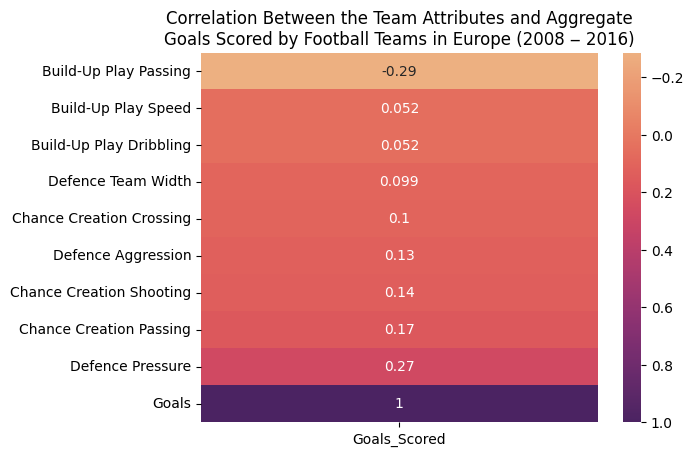

In [11]:
#   Plotting a heatmap for the correlation between the team attributes and the goals scored by the teams.

sns.heatmap(team_attributes_goals.corr()[["Goals_Scored"]].sort_values(by="Goals_Scored", ascending=True), annot=True, cmap="flare", yticklabels=["Build-Up Play Passing", "Build-Up Play Speed", "Build-Up Play Dribbling", "Defence Team Width", "Chance Creation Crossing", "Defence Aggression", "Chance Creation Shooting", "Chance Creation Passing", "Defence Pressure", "Goals"])
plt.title('''Correlation Between the Team Attributes and Aggregate
Goals Scored by Football Teams in Europe (2008 ‒ 2016)''')
plt.gcf().axes[1].invert_yaxis()
plt.show()

Based on the visualised heat map chart, it can be seen that defence pressure, when one or more defenders closely mark a ball carrier to pester them into losing the ball, had the strongest positive linear realtionship with the performance (aggregated goals scored) of the teams. Likewise, build-up play passing, working on quick play and sharp movement to create space and to improve in a game situation, had the strongest negative relationship. Hence, I've taken the team attribute with the strongest positive linear realtionship (defence pressure) and the team attribute with the strongest negative linear realtionship (build-up play passing), and visualised them individually to find the correlation they had with the performance (aggregated goals scored) of the teams.

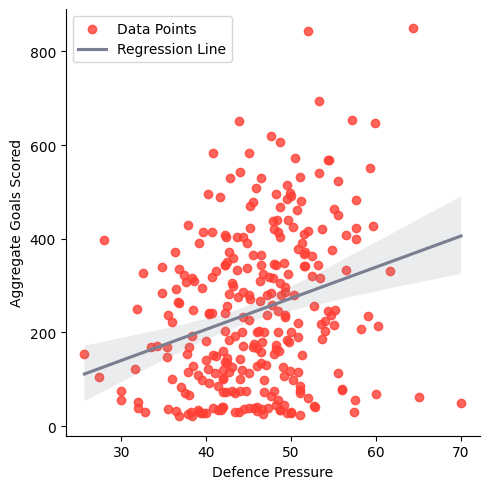

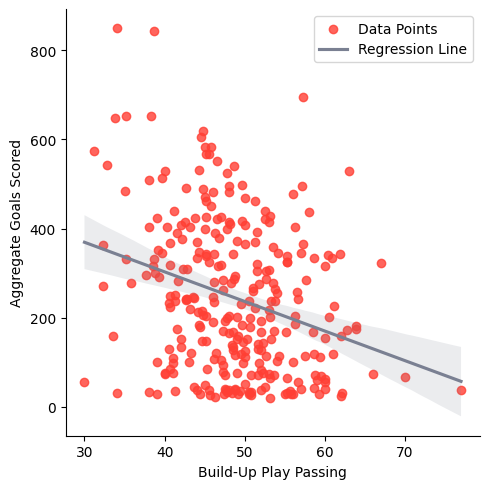

In [12]:
#   Plotting a scatter plot with the regression line for the correlation between the defence pressure and the aggregated goals scored by the teams.

sns.lmplot(x="defencePressure", y="Goals_Scored", data=team_attributes_goals, scatter_kws={"color": "#ff3f34"}, line_kws={"color": "#7a8092"})
plt.xlabel("Defence Pressure")
plt.ylabel("Aggregate Goals Scored")
plt.legend(["Data Points", "Regression Line"])
plt.show()

#   Plotting a scatter plot with the regression line for the correlation between the build-up play passing and the aggregated goals scored by the teams.

sns.lmplot(x="buildUpPlayPassing", y="Goals_Scored", data=team_attributes_goals, scatter_kws={"color": "#ff3f34"}, line_kws={"color": "#7a8092"})
plt.xlabel("Build-Up Play Passing")
plt.ylabel("Aggregate Goals Scored")
plt.legend(["Data Points", "Regression Line"])
plt.show()

Judging from the visualised correlation between the strongest positive and negatives team attributes, we can see that as the defence pressure increased, so did the performance (aggregated goals scored) of the teams. Similarly, as the build-up play passing increased, the performance (aggregated goals scored) of the teams decreased. It's important to note, however, that these correlations aren't perfect (and they don't have to be), as there are, obviously, other contributing factors that determine the performance of a team, but the point is that a correlation *did* exist between the team attributes and the performance (aggregated goals scored) of the teams.

#### ‣ How did the aggregated goals scored for the top five highest-scoring teams in a specific league (Italy Serie A) change over the seasons?

One important detail that can be visualised from the information about the performance of all the teams is the change in how they performed over the entire (or a specific) duration. Since there is information about nearly 300 teams in the database, it wouldn't be practical to visualise all of their performance changes, so I've only visualised the change in the performance of the top five highest-scoring teams over the seasons in a specific league, Italy Serie A. As a measure of performance, I've, once again, used the aggregated goals scored by each team in each season in the league.

Firstly, I've found the top five highest-scoring teams in Italy Serie A, which are seemingly Juventus, AS Roma FC, S.S.C. Napoli, A.C. Milan, and Inter Milan, by filtering the pandas.DataFrame according to the teams associated with the specific league and sorting their aggregated goals scored across all seasons in descending order.

In [13]:
italy_serie_a=dataframe[dataframe["League"]=="Italy Serie A"].groupby(["Team", "Season"])["Goals_Scored"].sum().reset_index()   #   Grouping the pandas.DataFrame by the teams and seasons in a specific league, and aggregating the goals scored.
italy_serie_a=italy_serie_a.sort_values(by="Goals_Scored", ascending=False).reset_index(drop=True)  #   Sorting the pandas.DataFrame by the aggregated goals scored in descending order.
italy_serie_a_goals=italy_serie_a.groupby("Team")["Goals_Scored"].sum().reset_index()   #   Grouping the pandas.DataFrame by the teams, and aggregating the goals scored.
italy_serie_a_goals=italy_serie_a_goals.sort_values(by="Goals_Scored", ascending=False).reset_index(drop=True)  #   Sorting the pandas.DataFrame by the aggregated goals scored in descending order.
italy_serie_a_goals.head(5)

,Team,Goals_Scored
0,Juventus,543
1,Roma,530
2,Napoli,514
3,Milan,496
4,Inter,496


With the top five highest-scoring teams in Italy Serie A known, I've visualised the change in the performance (aggregated goals scored) of the teams over the seasons through a multi-line chart.

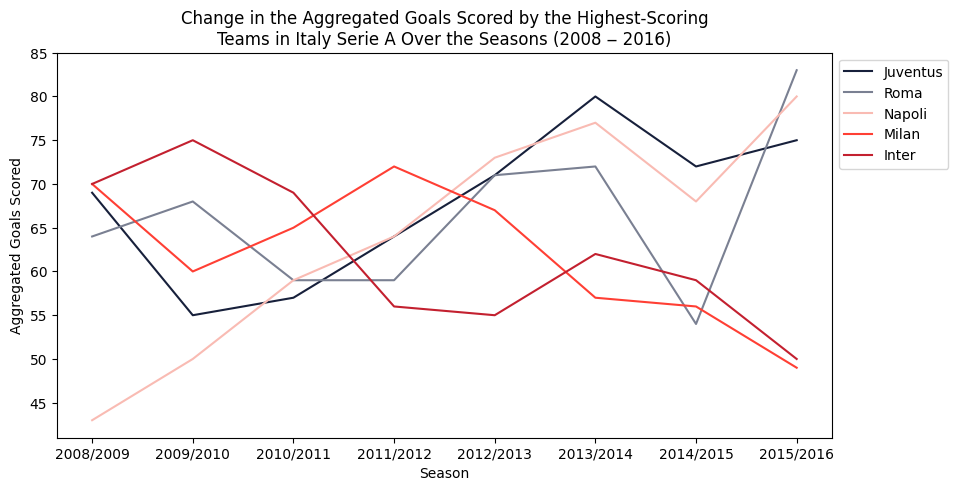

In [14]:
#   Sorting the pandas.DataFrame according to the season in ascending order for each team, and storing them in separate pandas.DataFrames for each team.

juventus=(italy_serie_a[italy_serie_a["Team"]=="Juventus"]).sort_values(by="Season").reset_index(drop=True)
roma=(italy_serie_a[italy_serie_a["Team"]=="Roma"]).sort_values(by="Season").reset_index(drop=True)
napoli=(italy_serie_a[italy_serie_a["Team"]=="Napoli"]).sort_values(by="Season").reset_index(drop=True)
milan=(italy_serie_a[italy_serie_a["Team"]=="Milan"]).sort_values(by="Season").reset_index(drop=True)
inter=(italy_serie_a[italy_serie_a["Team"]=="Inter"]).sort_values(by="Season").reset_index(drop=True)

#   Plotting a line plot for the change in the aggregated goals scored by the top five highest-scoring teams in Italy Serie A over the seasons.

plt.figure(figsize=(10, 5))
plt.plot(juventus["Season"], juventus["Goals_Scored"], color="#17203b", label="Juventus")
plt.plot(roma["Season"], roma["Goals_Scored"], color="#7a8092", label="Roma")
plt.plot(napoli["Season"], napoli["Goals_Scored"], color="#f9bbb3", label="Napoli")
plt.plot(milan["Season"], milan["Goals_Scored"], color="#ff3f34", label="Milan")
plt.plot(inter["Season"], inter["Goals_Scored"], color="#c3202f", label="Inter")
plt.title('''Change in the Aggregated Goals Scored by the Highest-Scoring
Teams in Italy Serie A Over the Seasons (2008 ‒ 2016)''')
plt.xlabel("Season")
plt.ylabel("Aggregated Goals Scored")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

It can be seen that S.S.C. Napoli saw a constant increase in performance (aggregated goals scored) between 2008/2009 and 2013/2014, even surpassing the highest-scoring team, Juventus, at once point, but saw a sudden decrease in the subsequent season, which is also where all the other teams saw a sudden decrease in performance (aggregated goals scored), but while Juventus, AS Roma FC, and S.S.C. Napoli were able to recover, A.C. Milan and Inter Milan showed the opposite. Judging from the performance change of A.C. Milan and Inter Milan, it can be noticed that both teams relatively poorly over the seasons, with a very inconsistent and unforeseen improvement.

As with the team attributes, it only makes sense to analyse the player attributes as well, since they are present in the database in the **Player_Attributes** table. However, before anything can performed on the player attributes, the table needs to first be organised in the appropriate format, which means joining the corresponding columns from other tables for further information that can potentially be analysed. In this case, I've combined the player_name, height, and weight columns from the **Player** table with the **Player_Attributes** table using an inner join based on their corresponding foreign keys into newly created columns.

In [15]:
cursor.execute("BEGIN TRANSACTION;")    #   Beginning a transaction to improve the execution time of the queries.

#   Creating corresponding columns in the table to store the names, heights, and weights of the players.

cursor.execute('''ALTER TABLE Player_Attributes
                    ADD COLUMN "Player" TEXT;''')

cursor.execute('''ALTER TABLE Player_Attributes
                    ADD COLUMN "Height" TEXT;''')

cursor.execute('''ALTER TABLE Player_Attributes
                    ADD COLUMN "Weight" TEXT;''')

#   Updating the corresponding columns with the names, heights, and weights of the players after joining the tables.

cursor.execute('''UPDATE Player_Attributes
                    SET Player=(
                    SELECT Player.player_name
                        FROM Player
                        WHERE Player_Attributes.player_api_id=Player.player_api_id),
                    Height=(
                        SELECT Player.height
                        FROM Player
                        WHERE Player_Attributes.player_api_id=Player.player_api_id),
                    Weight=(
                        SELECT Player.weight
                        FROM Player
                        WHERE Player_Attributes.player_api_id=Player.player_api_id);''')

cursor.execute("END TRANSACTION;")  #   Ending the transaction.

Since the **Player_Attributes** table is relatively large (183,978 rows), it'd be inefficient to store all of it into a pandas.DataFrame, particularly since most of the information is redundant anyway. For this reason, like the team attributes, I've taken the mean of each player attribute for each player grouped by the player through an SQL query, and stored the resulting database in a pandas.DataFrame alongside the Height and Weight columns from the table. Not only does this decrease the database significantly (10,848 rows), but it also removes an inconsistencies the player attributes may have.

In [16]:
player_attributes=pd.read_sql_query('''SELECT Player,
                                        Weight,
                                        Height,
                                        AVG(overall_rating) AS "Overall_Rating", 
                                        AVG(potential) AS "Potential", 
                                        AVG(crossing) AS "Crossing", 
                                        AVG(finishing) AS "Finishing",
                                        AVG(heading_accuracy) AS "Head_Accuracy",
                                        AVG(short_passing) AS "Short_Passing",
                                        AVG(volleys) AS "Volleys",
                                        AVG(dribbling) AS "Dribbling",
                                        AVG(curve) AS "Curve",
                                        AVG(free_kick_accuracy) AS "Free_Kick_Accuracy",
                                        AVG(long_passing) AS "Long_Passing",
                                        AVG(ball_control) AS "Ball_Control",
                                        AVG(acceleration) AS "Acceleration",
                                        AVG(sprint_speed) AS "Sprint_Speed",
                                        AVG(agility) AS "Agility",
                                        AVG(reactions) AS "Reactions",
                                        AVG(balance) AS "Balance",
                                        AVG(shot_power) AS "Short_Power",
                                        AVG(jumping) AS "Jumping",
                                        AVG(stamina) AS "Stamina",
                                        AVG(strength) AS "Strength",
                                        AVG(long_shots) AS "Long_Shots",
                                        AVG(aggression) AS "Aggression",
                                        AVG(interceptions) AS "Interceptions",
                                        AVG(positioning) AS "Positioning",
                                        AVG(vision) AS "Vision",
                                        AVG(penalties) AS "Penalties",
                                        AVG(marking) AS "Marking",
                                        AVG(standing_tackle) AS "Standing_Tackle",
                                        AVG(sliding_tackle) AS "Sliding_Tackle",
                                        AVG(gk_diving) AS "Goalkeeper_Diving",
                                        AVG(gk_handling) AS "Goalkeeper_Handling",
                                        AVG(gk_kicking) AS "Goalkeeper_Kicking",
                                        AVG(gk_positioning) AS "Goalkeeper_Positioning",
                                        AVG(gk_reflexes) AS "Goalkeeper_Reflexes"
                                        FROM Player_Attributes
                                        GROUP BY Player;''', connection)
player_attributes

,Player,Weight,Height,Overall_Rating,Potential,Crossing,Finishing,Head_Accuracy,Short_Passing,Volleys,...,Vision,Penalties,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeper_Diving,Goalkeeper_Handling,Goalkeeper_Kicking,Goalkeeper_Positioning,Goalkeeper_Reflexes
0,Aaron Appindangoye,187,182.88,63.600000,67.600000,48.600000,43.600000,70.600000,60.600000,43.600000,...,53.600000,47.600000,63.800000,66.000000,67.800000,5.600000,10.600000,9.600000,7.600000,7.600000
1,Aaron Cresswell,146,170.18,66.969697,74.484848,70.787879,49.454545,52.939394,62.272727,29.151515,...,57.454545,53.121212,69.393939,68.787879,71.515152,12.181818,8.666667,14.242424,10.363636,12.909091
2,Aaron Doran,163,170.18,67.000000,74.192308,68.115385,57.923077,58.692308,65.115385,54.269231,...,69.384615,60.538462,22.038462,21.115385,21.346154,14.038462,11.807692,17.730769,10.115385,13.500000
3,Aaron Galindo,198,182.88,69.086957,70.782609,57.217391,26.260870,69.260870,64.695652,47.782609,...,53.782609,41.739130,70.608696,70.652174,68.043478,14.173913,11.173913,22.869565,11.173913,10.173913
4,Aaron Hughes,154,182.88,73.240000,74.680000,45.080000,38.840000,73.040000,64.760000,32.080000,...,46.480000,52.960000,77.600000,76.040000,74.600000,8.280000,8.320000,24.920000,12.840000,11.920000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10843,Zsolt Low,154,180.34,67.571429,72.857143,63.142857,44.571429,59.857143,66.857143,57.000000,...,66.000000,61.000000,61.000000,64.285714,59.000000,7.142857,18.714286,42.428571,16.714286,16.714286
10844,Zurab Khizanishvili,172,185.42,70.750000,78.125000,46.750000,43.000000,79.000000,58.875000,59.000000,...,63.000000,64.000000,70.750000,73.250000,65.000000,14.000000,18.500000,41.625000,19.000000,20.000000
10845,Zvjezdan Misimovic,176,180.34,80.000000,81.700000,78.200000,72.600000,57.400000,85.500000,77.000000,...,87.100000,70.900000,26.200000,31.200000,30.000000,9.000000,15.400000,42.100000,16.200000,12.000000
10846,de Oliveira Cleber Monteiro,170,182.88,66.111111,67.555556,53.111111,56.555556,63.000000,66.444444,45.777778,...,66.222222,53.111111,62.777778,65.333333,66.666667,11.111111,17.000000,38.444444,15.222222,16.555556


#### ‣ Did the Body Mass Index (BMI) of the players affect their performance score (overall rating)?

One of the most commonly used measures by endurance athletes is the Body Mass Index (BMI), which is defined as a person's weight in kilograms (or pounds) divided by the square of height in meters (or feet). Logically, it only makes sense that weight and height would be two of the most leading factors in influencing a player's physical ability. With the Body Mass Index (BMI) scale, a player may be classified as either being physically fit or physically unfit to play. However, recent analyses suggest that the scale may not be completely accurate and may lead to lead to misclassification of the athletes as overweight or obese.

However, this claim can easily be tested by analysing the performance of players and finding if a correlation exists between a player's Body Mass Index (BMI) and their performance score. Fortunately, the database already contains the information needed to do this. Since Body Mass Index (BMI) is a person's weight in kilograms (or pounds) divided by the square of height in meters (or feet), it can easily be calculated using the height and weight of each of the players.

$$
BMI = Mass ÷ (Height)^2
$$

In [17]:
player_attributes["Weight"]=player_attributes["Weight"].apply(lambda x: float(x)*0.453592)  #   Converting the weights of all the players from pounds to kilogrammes.
player_attributes["Height"]=player_attributes["Height"].apply(lambda x: float(x)*0.01)  #   Converting the heights of all the players from centimetres to metres.
player_attributes["BMI"]=player_attributes["Weight"]/(player_attributes["Height"]**2)   #   Calculating the Body Mass Index (BMI) of all the players, and storing it in a separate column.
player_attributes

,Player,Weight,Height,Overall_Rating,Potential,Crossing,Finishing,Head_Accuracy,Short_Passing,Volleys,...,Penalties,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeper_Diving,Goalkeeper_Handling,Goalkeeper_Kicking,Goalkeeper_Positioning,Goalkeeper_Reflexes,BMI
0,Aaron Appindangoye,84.821704,1.8288,63.600000,67.600000,48.600000,43.600000,70.600000,60.600000,43.600000,...,47.600000,63.800000,66.000000,67.800000,5.600000,10.600000,9.600000,7.600000,7.600000,25.361478
1,Aaron Cresswell,66.224432,1.7018,66.969697,74.484848,70.787879,49.454545,52.939394,62.272727,29.151515,...,53.121212,69.393939,68.787879,71.515152,12.181818,8.666667,14.242424,10.363636,12.909091,22.866579
2,Aaron Doran,73.935496,1.7018,67.000000,74.192308,68.115385,57.923077,58.692308,65.115385,54.269231,...,60.538462,22.038462,21.115385,21.346154,14.038462,11.807692,17.730769,10.115385,13.500000,25.529126
3,Aaron Galindo,89.811216,1.8288,69.086957,70.782609,57.217391,26.260870,69.260870,64.695652,47.782609,...,41.739130,70.608696,70.652174,68.043478,14.173913,11.173913,22.869565,11.173913,10.173913,26.853330
4,Aaron Hughes,69.853168,1.8288,73.240000,74.680000,45.080000,38.840000,73.040000,64.760000,32.080000,...,52.960000,77.600000,76.040000,74.600000,8.280000,8.320000,24.920000,12.840000,11.920000,20.885923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10843,Zsolt Low,69.853168,1.8034,67.571429,72.857143,63.142857,44.571429,59.857143,66.857143,57.000000,...,61.000000,61.000000,64.285714,59.000000,7.142857,18.714286,42.428571,16.714286,16.714286,21.478402
10844,Zurab Khizanishvili,78.017824,1.8542,70.750000,78.125000,46.750000,43.000000,79.000000,58.875000,59.000000,...,64.000000,70.750000,73.250000,65.000000,14.000000,18.500000,41.625000,19.000000,20.000000,22.692413
10845,Zvjezdan Misimovic,79.832192,1.8034,80.000000,81.700000,78.200000,72.600000,57.400000,85.500000,77.000000,...,70.900000,26.200000,31.200000,30.000000,9.000000,15.400000,42.100000,16.200000,12.000000,24.546746
10846,de Oliveira Cleber Monteiro,77.110640,1.8288,66.111111,67.555556,53.111111,56.555556,63.000000,66.444444,45.777778,...,53.111111,62.777778,65.333333,66.666667,11.111111,17.000000,38.444444,15.222222,16.555556,23.055889


For the performance scores of all of the players, once again, the database conveniently contains the overall ratings for all the players, which were extracted from FIFA Player Ratings for each yearly released FIFA instalment and the corresponding seasons that the players played during. Since the FIFA Player Ratings are assessed on the basis of a player's speed, shooting, passing, defending, dribbling, and physicality, it can be used as a performance measure for players in this analysis.

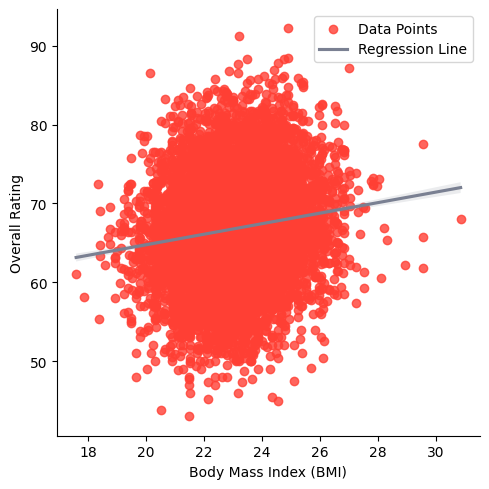

In [18]:
#  Plotting a scatter plot to show the relationship between the Body Mass Index (BMI) and the overall ratings of the players.

sns.lmplot(x="BMI", y="Overall_Rating", data=player_attributes, scatter_kws={"color": "#ff3f34"}, line_kws={"color": "#7a8092"})
plt.xlabel("Body Mass Index (BMI)")
plt.ylabel("Overall Rating")
plt.legend(["Data Points", "Regression Line"])
plt.show()

From the visualised correlation between the Body Mass Index (BMI) and the performance scores (overall ratings) of all the players, it seems like there's a very weak positive relationship between both attributes, almost negligible. Hence, while it can be concluded that Body Mass Index (BMI) has some correlation with the performance score (overall rating) of players, meaning that the performance scores of players tend to increase when the Body Mass Index (BMI) is primarily in the normal classification (18.5 - 24.9), it's not enough to be a leading factor.

It's also worth noting that there may be some discrepencies in this result, as I did take the mean of the performance scores (overall ratings) of all the players, so slightly more accurate results may be generated with better generalisation measures. However, the correlation may, more or less, still be the same.

#### ‣ Who were the top ten players with the highest performance scores (overall ratings) across all seasons and leagues during the entire duration?

It may be valuable to find the players that had the highest performance scores (overall ratings) across all seasons and leagues during the entire duration to further analyse the correlation between the player attributes and how they influenced the performance scores. For this reason, I've visualised the top ten players with the highest performance scores (overall ratings) across all seasons and leagues during the entire duration as a bar chart.

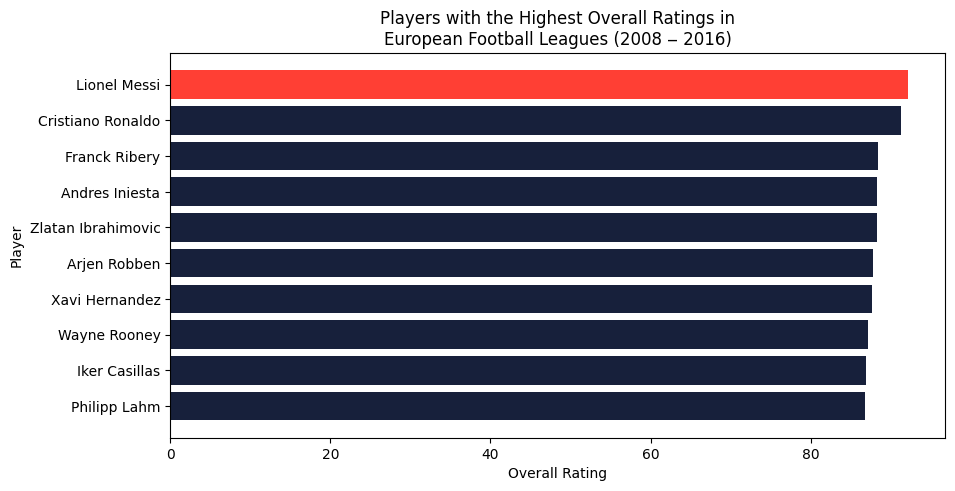

In [19]:
player_attributes=player_attributes.sort_values(by="Overall_Rating", ascending=False).reset_index(drop=True)    #   Sorting the players in descending order of their overall ratings.


#   Plotting a horizontal bar graph to show the top ten players with the highest overall ratings.

plt.figure(figsize=(10, 5))
plt.barh(player_attributes["Player"][:10], player_attributes["Overall_Rating"][:10], color="#17203b")
plt.barh(player_attributes["Player"][0], player_attributes["Overall_Rating"][0], color="#ff3f34")
plt.title('''Players with the Highest Overall Ratings in
European Football Leagues (2008 ‒ 2016)''')
plt.xlabel("Overall Rating")
plt.ylabel("Player")
plt.gca().invert_yaxis()
plt.show()

It's worth noting that there's also another performance measure for players in the database, potential, which refers to the upward ceiling of particular player and indicates how high they can reach in the attributes. Hence, it could also be useful to find the players that had the highest potential across all seasons and leagues during the entire duration to find some relation between both performance measures.

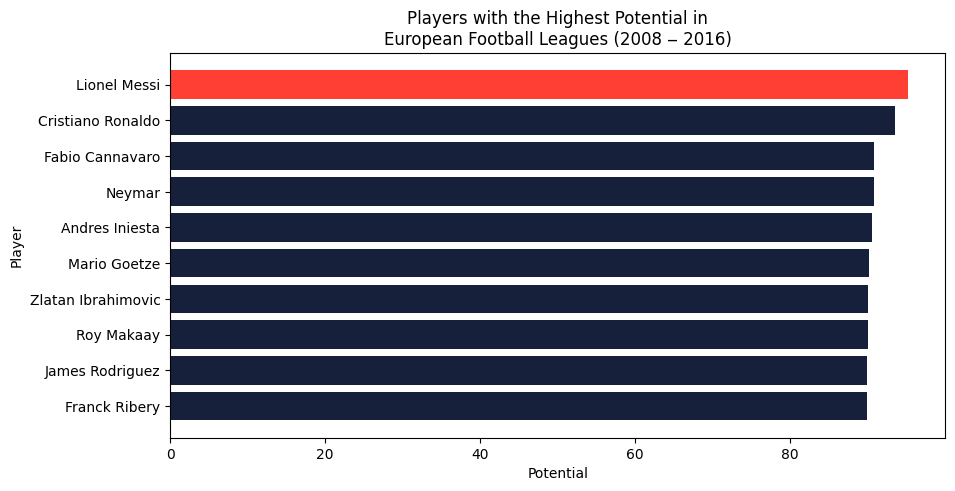

In [20]:
player_attributes=player_attributes.sort_values(by="Potential", ascending=False).reset_index(drop=True)    #   Sorting the players in descending order of their overall ratings.


#   Plotting a horizontal bar graph to show the top ten players with the highest overall ratings.

plt.figure(figsize=(10, 5))
plt.barh(player_attributes["Player"][:10], player_attributes["Potential"][:10], color="#17203b")
plt.barh(player_attributes["Player"][0], player_attributes["Potential"][0], color="#ff3f34")
plt.title('''Players with the Highest Potential in
European Football Leagues (2008 ‒ 2016)''')
plt.xlabel("Potential")
plt.ylabel("Player")
plt.gca().invert_yaxis()
plt.show()

As it stands, Lionel Messi and Cristiano Ronaldo had both the highest overall rating and potential consistently across all seasons and leagues during the entire duration. Further analyses on these two players could help find a correlation between their attributes and the ones of other players, and possibly explain why theirs excel the most.

#### ‣ How do the player attributes of the consistently highest-rated players compare to the average player attributes?

It would be valuable to compare the player attributes of the two highest-rated players in terms of both the overall rating and potential to see how they vary from the average player attributes. Since both Lionel Messi and Cristiano Ronaldo are forwards (outfield positions), there will likely be similarities between both their attributes. However, what's I'm interested in is finding how their player attributes compare to the average player attributes, and exactly what sets these two players apart from the rest.

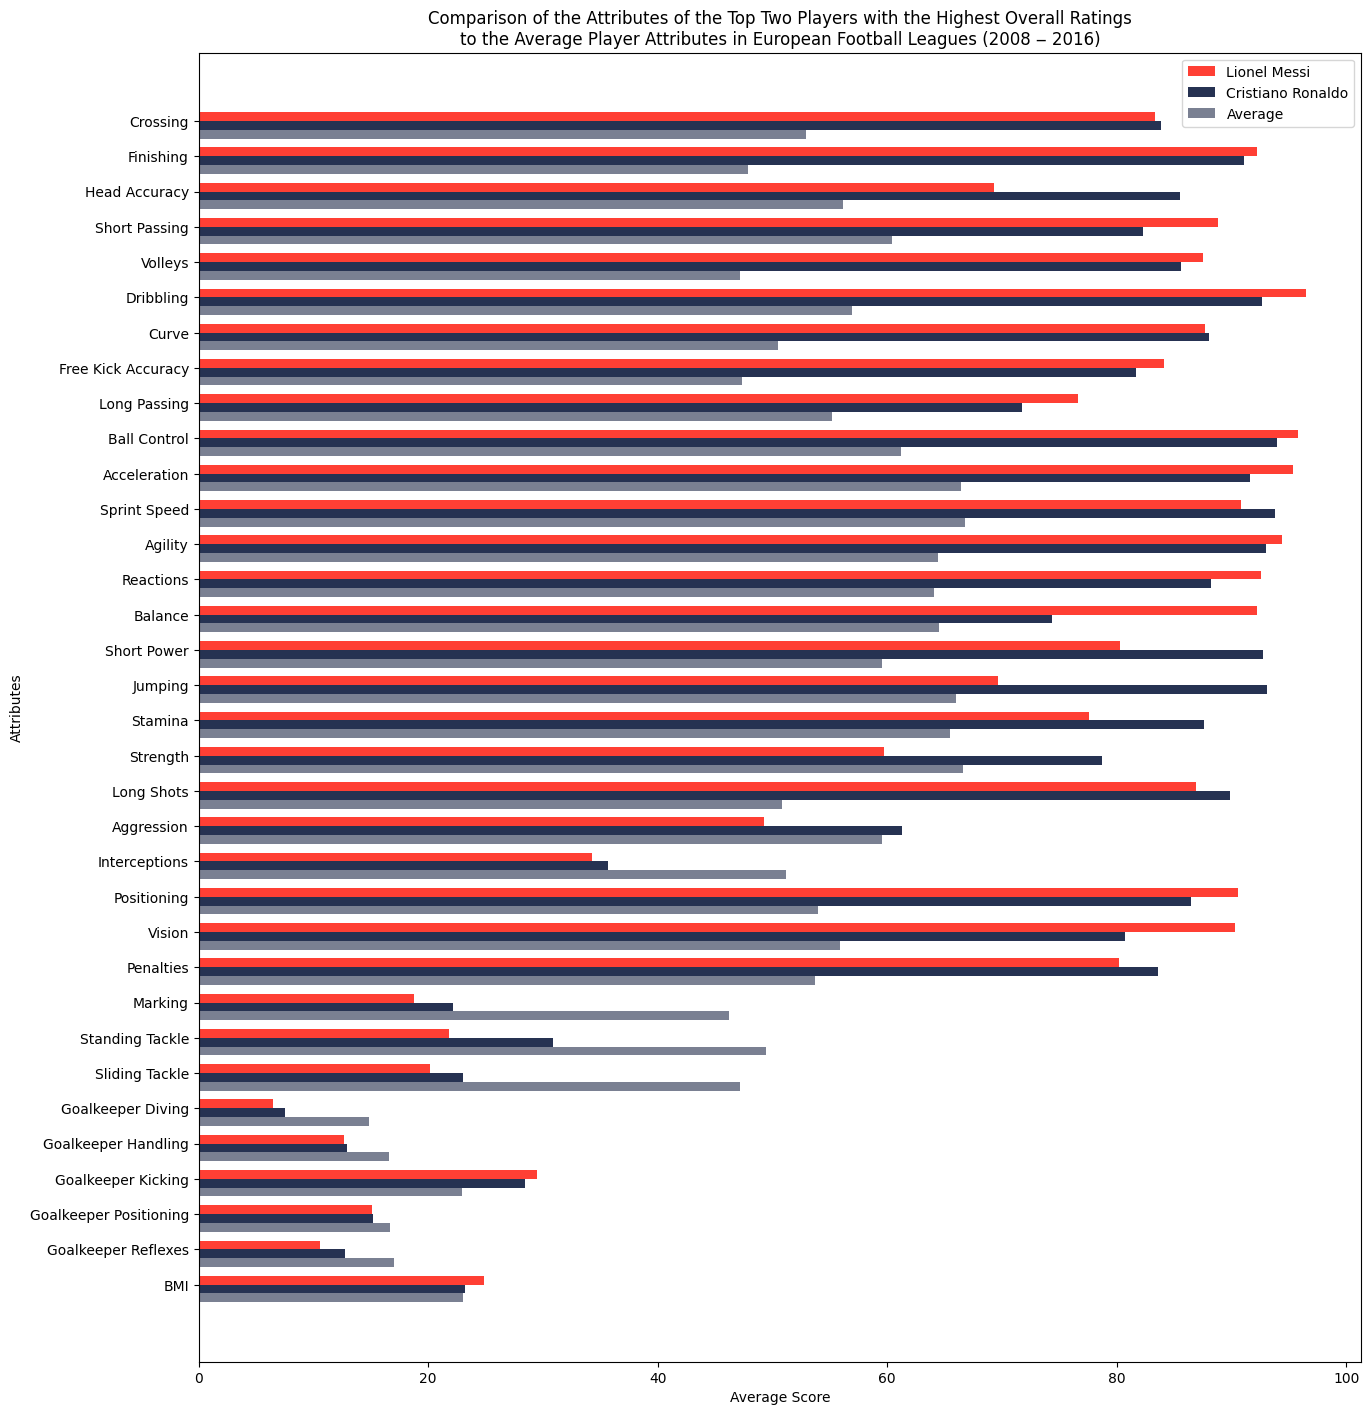

In [21]:
top_players=player_attributes["Player"][:2].tolist()    #   Storing the names of the top two players with the highest overall ratings in a list.
top_player_attributes=player_attributes[player_attributes["Player"].isin(top_players)]  #   Filtering the pandas.DataFrame to include only the top two players with the highest overall ratings.
top_player_attributes=top_player_attributes.transpose().reset_index()   #   Transposing the pandas.DataFrame.
top_player_attributes.columns=top_player_attributes.iloc[0] #   Setting the first row as the column names.
top_player_attributes=top_player_attributes.drop([0, 1, 2, 3, 4]).reset_index(drop=True)  #   Dropping the unnecessary rows.
top_player_attributes=top_player_attributes.rename(columns={"Player": "Attributes"})    #   Renaming the first column.
average_attributes=player_attributes.mean().reset_index()   #   Calculating the average of all the attributes for all the players, and storing it in a pandas.DataFrame.
average_attributes.columns=["Attributes", "Average"]    #   Setting the column names.
average_attributes=average_attributes.drop([0, 1, 2, 3]).reset_index(drop=True)  #   Dropping the unnecessary rows.
top_player_attributes["Attributes"]=top_player_attributes["Attributes"].apply(lambda x: x.replace("_", " "))    #   Replacing the underscores in the column values with spaces.

#   Plotting a horizontal bar graph to compare the attributes of the top two players with the highest overall ratings.

figure=plt.figure(figsize=(15, 17))
axis=figure.add_subplot()
width=np.arange(len(top_player_attributes["Attributes"]))
plt.barh(width-0.25, top_player_attributes.iloc[:, 1], color="#ff3f34", height=0.25, label="Lionel Messi", align="edge")
plt.barh(width, top_player_attributes.iloc[:, 2], color="#263252", height=0.25, label="Cristiano Ronaldo", align="edge")
plt.barh(width+0.25, average_attributes["Average"], color="#7a8092", height=0.25, label="Average", align="edge")
axis.set_yticks(width)
axis.set_yticklabels(top_player_attributes["Attributes"])
plt.title('''Comparison of the Attributes of the Top Two Players with the Highest Overall Ratings
to the Average Player Attributes in European Football Leagues (2008 ‒ 2016)''')
plt.xlabel("Average Score")
plt.ylabel("Attributes")
plt.gca().invert_yaxis()
plt.legend()
plt.show()

It can be noticed from the comparison of all the visualised player attributes that it's mostly the aggressive attributes, like crossing, finishing, and acceleration, that both the highest-rated players, Lionel Messi and Cristiano Ronaldo excel in, which was expected due to the positions they play on the field. However, an interesting detail to note is that, while the similarities between the attributes of the two players are almost negligible on most fronts, Cristiano Ronaldo particularly excels in attributes that primarily require strength and endurance, like shot power, jumping, and stamina. Once again, this is to be expected as Cristiano Ronaldo is significantly more muscular than Lionel Messi, but this does open up the possibility of another hypothesis to be tested, which is whether muscular strength could play a significant role in the performance of football players or not.

For defensive attributes, like interceptions, marking, sliding and standing tackle, it's obvious why there would be a variation between the attributes of Lionel Messi and Cristiano Ronaldo compared to the average player attributes, since neither primarily play defensive positions on the field. The same is the case for the goalkeeping attributes, too! Although, it's interesting to note that the average scores for defensive attributes are relatively high, meaning that the either the database predominantly contains information about defensive players or most of the players have comparatively high defensive attributes (outliers).

#### ‣ Which player attributes set the consistently highest-rated player apart from the average player attributes, and by how much?

From the analyses, it's clear that Lionel Messi generally excelled across all fronts. However, of course, not all the attributes that the player was assessed for dominated in his ranking. Hence, it'd only make sense to analyse the ones that consistenly made him the highest-rated player, and how they vary from the average player attributes.

For this, however, the information would first need to be organised according to the performance score assigned to the player for each attribute, which I've done by sorting the pandas.DataFrame in descending order of the performance scores for each player attribute of Lionel Messi. Additionally, there's also no need to assess the defensive attributes, as they will cause unnecessary variation, so I've removed those attributes entirely. In this analysis, I've only used the first sixteen highest-rated attributes of the player, since some of them are redundant.

In [22]:
messi_attributes=top_player_attributes.drop(["Cristiano Ronaldo"], axis=1)  #   Creating a new pandas.DataFrame to store the attributes of the specific player.
messi_attributes=messi_attributes.sort_values(by="Lionel Messi", ascending=False).reset_index(drop=True)    #   Sorting the specific player attributes in descending order.
messi_attributes=messi_attributes.iloc[:-18, : ]    #   Dropping the last few rows, as they are either unnecessary or redundant.
messi_attributes

,Attributes,Lionel Messi
0,Dribbling,96.461538
1,Ball Control,95.769231
2,Acceleration,95.307692
3,Agility,94.384615
4,Reactions,92.538462
5,Balance,92.230769
6,Finishing,92.230769
7,Sprint Speed,90.846154
8,Positioning,90.538462
9,Vision,90.269231


Since the highest-rated attributes of the player are being compared against the average player attributes, the average player attributes also need to organised the same way.

In [23]:
average_attributes["Attributes"]=average_attributes["Attributes"].apply(lambda x: x.replace("_", " "))  #   Replacing the underscores in the column values with spaces.
messi_attributes=messi_attributes.merge(average_attributes, on="Attributes")    #   Merging both the pandas.DataFrames into one.
messi_attributes

,Attributes,Lionel Messi,Average
0,Dribbling,96.461538,56.922923
1,Ball Control,95.769231,61.174821
2,Acceleration,95.307692,66.414245
3,Agility,94.384615,64.425084
4,Reactions,92.538462,64.048981
5,Balance,92.230769,64.494772
6,Finishing,92.230769,47.880555
7,Sprint Speed,90.846154,66.806224
8,Positioning,90.538462,53.956360
9,Vision,90.269231,55.897250


Based on the highest-rated attributes for the consistently highest-rated player, Lionel Messi, compared against the average player attributes, the performance scores for the average player attributes are nearly half that of the performance scores for the highest-rated attributes of Lionel Messi. However, this variation can be analysed even better with a visualisation, which I've done through a polar chart.

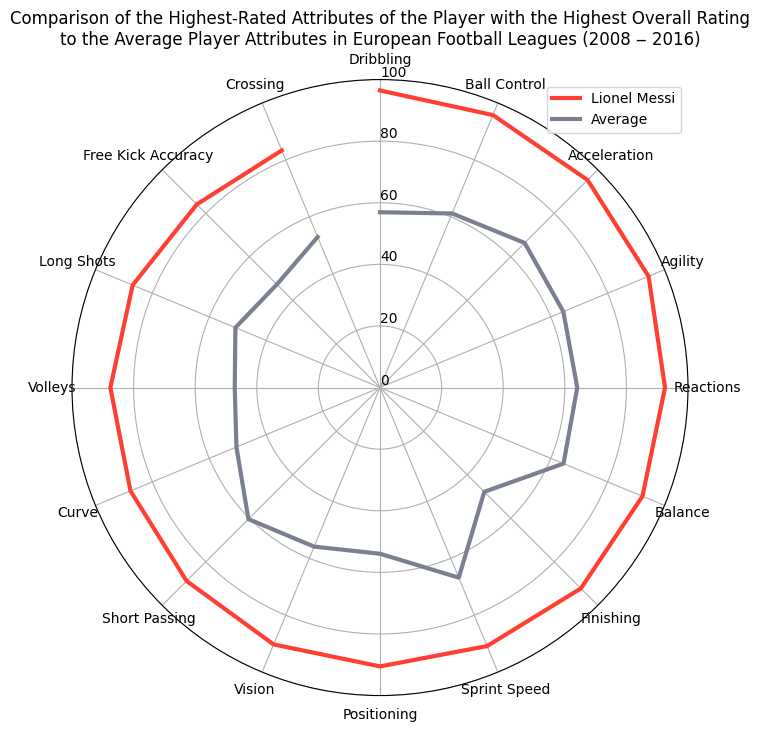

In [24]:
#   Plotting a polar chart to compare the highest-rated attributes of the player with the highest overall rating to the average player attributes.

figure=plt.figure(figsize=(8, 8))
axis=figure.add_subplot(projection="polar")
axis.set_theta_zero_location("N")
axis.set_theta_direction(-1)
axis.set_rlabel_position(0)
axis.set_yticks([0, 20, 40, 60, 80, 100])
axis.set_yticklabels(["0", "20", "40", "60", "80", "100"])
axis.set_ylim(0, 100)
axis.set_xticks(np.arange(0, 2*np.pi, np.pi/8))
axis.set_xticklabels(messi_attributes["Attributes"], rotation=90)
axis.plot(np.arange(0, 2*np.pi, np.pi/8), messi_attributes.iloc[:, 1], color="#ff3f34", label="Lionel Messi", linewidth=3)
axis.plot(np.arange(0, 2*np.pi, np.pi/8), messi_attributes.iloc[:, 2], color="#7a8092", label="Average", linewidth=3)
plt.title('''Comparison of the Highest-Rated Attributes of the Player with the Highest Overall Rating
to the Average Player Attributes in European Football Leagues (2008 ‒ 2016)''')
plt.legend()
plt.show()

As can be seen in the visualised chart, the variation between the highest-rated attributes for the consistently highest-rated player against the average player attributes is almost half, except for one player attribute where the average player attribures slightly excel, sprint speed, which is interesting because Lionel Messi was rated with a performance score of nearly 91% for sprint speed and the average sprint speed coming close to it indicates that the highest-rated attribute in most football players across leagues in Europe was their sprint speed.

In [25]:
connection.close()  #   Closing the connection to the database.